# Abstract Vector Spaces 

Mathematics is the art of reducing any problem to linear algebra. 

-- William Stein

For $[a, b] \subset \mathbb{R}$, the space $C([a, b]; \mathbb{F})$ of continuous 
$F-valued$ functions. Vector addition is given by defining the function
$f+g$ as $(f+g)(x) = f(x) + g(x)$, and scalar multiplication is given by
definiting the function $cf$ by $(cf)(x) = c \cdot f(x)$. Note that $C([a, b]; \mathbb{F})$
is closed under vector addition and scalar multiplication because sums and
scalar products of continuous functions are continuous. 

Let $V$ be a vector space. A nonempty subset $W \subset V$ is a subspace of $V$ 
if $W$ itself is a vector space under the same operations of vector 
addition and scalar multiplication as $V$. 

Let $A$ be an $m \times n$ matrix. 

- The __column space__ of $A$ is the subspace of $\mathbb{R}^m$ spanned by the
columns of $A$. It is written Col(A).
- The __null space__ of $A$ is the subspace of $\mathbb{R}^n$ consisting of all
solutions of the homogeneous equation $Ax = 0$:

$$\text{Null}(A) = \{x \in \mathbb{R}^n | Ax = 0 \}$$

Find a spanning set for the null space of the matrix

$$
A = 
\begin{bmatrix}
  2 & 3 & -8 & -5\\
  -1 & 2 & -3 & 8\\
\end{bmatrix}
$$

We compute the parametric vector form of the solution of $Ax 0 0$. The
reduced row echelon form of $A$ is 


$$
\begin{bmatrix}
  1 & 0 & -1 & 2\\
  0 & 1 & -2 & -3\\
\end{bmatrix}
$$

The free variables are $x_3$ and $x_4$; the parametric form of the
solution set is 

$$
\begin{cases}
x_1 = x_3 -2 x_4 \\
x_2 = 2x_3 +3 x_4 \\
x_3 = x_3 \\ 
x_4 = x_4
\end{cases}
$$

Therefore,

$$
\text{Null}(A) = \text{Span} \left \{ 
  \begin{pmatrix}
  1 \\
2 \\
1  \\ 
0
  \end{pmatrix}, \begin{pmatrix}
  -2 \\
3 \\
0  \\ 
1
  \end{pmatrix}
  \right \}
$$

## Quotient Vector Spaces 

Suppose $W$ is a subspace of a finitely generated vector space $V$ over a 
field $\mathbb{F}$ and $v$ is a vecotr in $V$. Let

$$[v]_W = \{v + w | w \in W, v \in V\}$$

This is a __subset__ of $V$, but in general it is not a __subspace__ of $V$. 

Let $V$ be a vector space $V$ over a field $\mathbb{F}$ and let $W$ be 
a subspace of $V$. Then define 

$$V/W = \{[v]_W | v \in V \}$$

Define operators of scalar multiplication and vector addition on $V/S$ 
as follows:

\begin{aligned}
[x]_W + [y]_W & = [x+y]_W \\
a \cdot [x]_W & = [a x]_W
\end{aligned}

Then with these operations $V/S$ has the structure of a vector space over 
$\mathbb{F}$. 

Quotient space and quotient vector spaces have many applications in 
functional analysis and measure theory. 

![quotient-space](https://calculus123.com/images/e/ea/Vector_subspace_and_quotient_space.png)

## Bernstein Polynomials

Given $n \in \mathbb{N}$, the _Bernstein polynomials_ $\{B_j^n (x) \}_{j=0}^n$
of degree n are defined as 

$$
\{B_j^n (x) \}_{j=0}^n = {n \choose j} x^j (1-x)^{n-j}, \quad {n \choose j} = \frac{n!}{j!(n-j)!}
$$

One could also show 

$$
\{B_j^n (x) \}_{j=0}^n = \sum_{i=j}^n (-1)^{i-j} {n \choose i} {i \choose j} x^i
$$

In [63]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [51]:
def bernstein(n, j):
    """
    Bernstein polynomails Ceofficients Function 
    --------------------
    n: the highest degree 
    j: degree j < n 

    Output: a row vector with length n 
    """
    coefficients = np.zeros(n+1)
    for i in range(j, n+1):
        coef = (-1)**(i-j) * math.comb(n, i) * math.comb(i, j)
        coefficients[i] = coef
    
    return coefficients

with the standard polynomial basis $S = [1, x, x^2, x^3, x^4]$, and we can
compute the transition matrix $P_{ST}$ from the Bernstein basis:

$$
T = [B_0^4 (x), B_1^4 (x), B_2^4 (x), B_3^4 (x), B_4^4 (x)] = \begin{bmatrix}
  1 &  x & x^2 & x^3 & x^4
\end{bmatrix} \begin{bmatrix}
  1. & 0. & 0. & 0. & 0.\\
  -4. & 4. & 0. & 0. & 0.\\
  6. & -12. & 6. & 0. & 0.\\
  -4. & 12. & -12. & 4. & 0.\\
  1. & -4. & 6. & -4. & 1.\\
\end{bmatrix} 
$$

In [52]:
size = 5
bmat = np.zeros((size, size))
for i in range(size):
    bvect = bernstein(size-1, i)
    bmat[:, i] = bvect

bmat

array([[  1.,   0.,   0.,   0.,   0.],
       [ -4.,   4.,   0.,   0.,   0.],
       [  6., -12.,   6.,   0.,   0.],
       [ -4.,  12., -12.,   4.,   0.],
       [  1.,  -4.,   6.,  -4.,   1.]])

In [56]:
def bernstein_polynomial(n, i, x):
    """
    Bernstein Polynomail function
    Calculate the polynomial based on value of x 
    -----------------------------
    n: the highest degree
    i: degree 
    x: value of a real number 
    """
    bern_vect = bernstein(n, i)
    x_vect = np.zeros(n+1)
    for j in range(0, n+1):
        x_vect[j] = x**j 
        
    return np.dot(x_vect, bern_vect)

ValueError: setting an array element with a sequence.

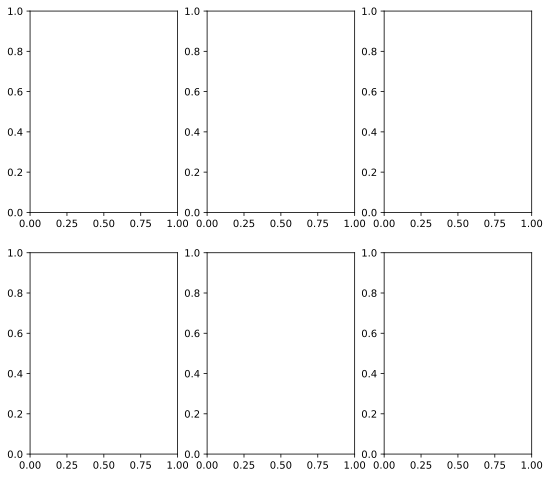

In [64]:
# plot the function
fig, axes = plt.subplots(2, 3, figsize=(7, 7))
axes = axes.ravel()
x = np.linspace(0, 1, 1000)
for idx, ax in enumerate(axes):
    ax.plot(x, bernstein_polynomial(4, idx, x))

In [27]:
print(bmatrix(bmat))

\begin{bmatrix}
  1. & 0. & 0. & 0. & 0.\\
  -4. & 4. & 0. & 0. & 0.\\
  6. & -12. & 6. & 0. & 0.\\
  -4. & 12. & -12. & 4. & 0.\\
  1. & -4. & 6. & -4. & 1.\\
\end{bmatrix}


In [1]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

## References

1. Margalit and Rabinoff (2022): https://textbooks.math.gatech.edu/ila/subspaces.html